# Exploratory Data Analysis of Covid Cases and Deaths WorldWide

I found the dataset of car details from car dekho from Kaggle

Link of the Dataset:https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('covid_worldwide.csv')

In [3]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


# Welcome to Covid Cases and Deaths WorldWide
Country: The name of the country where the COVID-19 cases have been reported.

Total Cases: The total number of confirmed COVID-19 cases reported in the country.

Total Deaths: The total number of deaths reported in the country due to COVID-19.

Total Recovered: The total number of people who have recovered from COVID-19 in the country.

Active Cases: The current number of active COVID-19 cases in the country (i.e., the number of people who currently have COVID-19 and have not yet recovered or died).

Total Test: The total number of COVID-19 tests administered in the country.

Population: The population of the country.

Overall, this dataset appears to contain information on the spread and impact of COVID-19 in different countries around the world, including the number of cases, deaths, recoveries, and tests, as well as the population of each country.

# As starting of our project firstly we have see the only first 5 and last 5 rows to understand the data properly and take proper discussion

In [4]:
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [5]:
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


# Now we can start extracting information from this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


The DataFrame has 231 rows (entries) and 8 columns, with a RangeIndex starting at 0 and ending at 230.
he first column, "Serial Number", has a Dtype of int64 (an integer). The other seven columns ("Country", "Total Cases", "Total Deaths", "Total Recovered", "Active Cases", "Total Test", and "Population") all have a Dtype of object, indicating that they contain string data.

There are some missing values in the DataFrame, as indicated by the differences between the number of non-null values and the total number of entries in each column. Specifically, there are missing values in the "Total Deaths", "Total Recovered", "Active Cases", and "Total Test" columns, as well as in the "Population" column.



As columns as some null values and string all the columns are in object so can describe data later on.

In [7]:
df.nunique()

Serial Number      231
Country            231
Total Cases        231
Total Deaths       213
Total Recovered    210
Active Cases       181
Total Test         212
Population         228
dtype: int64

This output shows the number of non-null values for each column in the dataset. It looks like there are a total of 231 entries in the dataset, and all columns have at least 181 non-null values, with some columns having more missing values than others.

We can see that the "Serial Number", "Country", and "Total Cases" columns have no missing values, while the "Total Deaths", "Total Recovered", "Active Cases", "Total Test", and "Population" columns have some missing values.

# Data cleaning and proceesing
It's important to note that missing values can affect the accuracy of any analysis or modeling we might do with this data, so we may need to handle these missing values appropriately 

In [8]:
df.isnull().sum()/len(df)*100

Serial Number      0.000000
Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64

As we see percentage missing values of this columns are in between 4 to 40% , so we can fill Na values using mean

But all the columns except serial number are in object dtypes so we have to change the datatype of the resepetive columns

In [9]:
df['Total Cases']=df['Total Cases'].str.replace(',','')


In [10]:
df['Total Cases']=df['Total Cases'].astype('float')

In [11]:
df['Total Deaths']=df['Total Deaths'].str.replace(',','')
df['Total Deaths']=df['Total Deaths'].astype('float')


In [12]:
df['Total Recovered']=df['Total Recovered'].str.replace(',','')
df['Total Recovered']=df['Total Recovered'].astype('float')

In [13]:
df['Active Cases']=df['Active Cases'].str.replace(',','')
df['Active Cases']=df['Active Cases'].astype('float')

In [14]:
df['Total Test']=df['Total Test'].str.replace(',','')
df['Total Test']=df['Total Test'].astype('float')

In [15]:
df['Population']=df['Population'].str.replace(',','')
df['Population']=df['Population'].astype('float')

In [16]:
df.dtypes

Serial Number        int64
Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Total Test         float64
Population         float64
dtype: object

Now each columns have perfect datatype we can fill null values 

In [17]:
df.isnull().sum()/len(df)*100

Serial Number      0.000000
Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64

In [18]:
meantd=df['Total Deaths'].mean()
meantd

30057.777777777777

In [19]:
df['Total Deaths']=df['Total Deaths'].fillna(meantd)

In [20]:
meantr=df['Total Recovered'].mean()
meantr

2993905.1285714284

In [21]:
df['Total Recovered']=df['Total Recovered'].fillna(meantr)

In [22]:
meanac=df['Active Cases'].mean()
meanac

90998.84905660378

In [23]:
df['Active Cases']=df['Active Cases'].fillna(meanac)

In [24]:
meanTT=df['Total Test'].mean()
meanTT

32493160.42253521

In [25]:
df['Total Test']=df['Total Test'].fillna(meanTT)

In [26]:
meanP=df['Population'].mean()
meanP

28493261.978070177

In [27]:
df['Population']=df['Population'].fillna(meanP)

In [28]:
df.isnull().sum()/len(df)*100

Serial Number      0.0
Country            0.0
Total Cases        0.0
Total Deaths       0.0
Total Recovered    0.0
Active Cases       0.0
Total Test         0.0
Population         0.0
dtype: float64

We sucessfully fill the null values as now there is null values present in this datasets

#  Analyzing  dataset using charts and plots

# 1.How many countries are in the dataset and what are they?

In [32]:
df['Country'].nunique()

231

In [36]:
lists=df['Country'].unique()
lists

array(['USA', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'S. Korea',
       'Italy', 'UK', 'Russia', 'Turkey', 'Spain', 'Vietnam', 'Australia',
       'Argentina', 'Taiwan', 'Netherlands', 'Iran', 'Mexico',
       'Indonesia', 'Poland', 'Colombia', 'Austria', 'Greece', 'Portugal',
       'Ukraine', 'Chile', 'Malaysia', 'Israel', 'DPRK', 'Thailand',
       'Belgium', 'Czechia', 'Canada', 'Peru', 'Switzerland',
       'Philippines', 'South Africa', 'Romania', 'Denmark', 'Hong Kong',
       'Sweden', 'Serbia', 'Iraq', 'Singapore', 'Hungary', 'New Zealand',
       'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland',
       'Pakistan', 'Norway', 'Finland', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Bulgaria', 'Morocco', 'Croatia', 'Lebanon',
       'Guatemala', 'Bolivia', 'Costa Rica', 'Tunisia', 'Cuba', 'Ecuador',
       'UAE', 'Uruguay', 'Panama', 'Mongolia', 'Nepal', 'Belarus',
       'Latvia', 'Saudi Arabia', 'Azerbaijan', 'Paraguay', 'Bahrain',
       'Sri Lanka', 'Kuwai

# 2.What is the total number of COVID-19 cases, deaths, and recoveries worldwide?

In [41]:
Total_cases=df['Total Cases'].sum()
Total_deaths=df['Total Deaths'].sum()
Total_recovred=df['Total Recovered'].sum()


In [43]:
Total_cases


675319264.0

In [44]:
Total_recovred

691592084.6999999

In [45]:
Total_deaths

6943346.666666667

According to the data there are '675319264.0' Total cases are register ,'6943346.666666667' are Total deaths and '691592084.6999999' cases are recovered

# 3. Which country has the highest number of active COVID-19 cases?

In [56]:
Active_cases=df.sort_values('Active Cases',ascending=False)

In [57]:
Highest_number_of_active_cases=Active_cases.iloc[0]['Country']
Highest_number_of_active_cases

'Japan'

'Japan has highest number of active COVID-19 cases

# 4.How many COVID-19 tests have been conducted worldwide and what is the average testing rate per 1000 people?

In [60]:
worldwide_Total_test=df['Total Test'].sum()
worldwide_Total_test

7505920057.605634

In [62]:
avg_test=df['Total Test'].sum()/df['Population'].sum()*1000
avg_test

1140.3805028551506

There are '7505920057' Test conducted Worldwide and '1140' are average testing rate per 1000 people

# 5.What is the correlation between total cases, total deaths, and total recovered?

In [69]:
corr=df[['Total Cases','Total Recovered','Total Deaths']].corr()


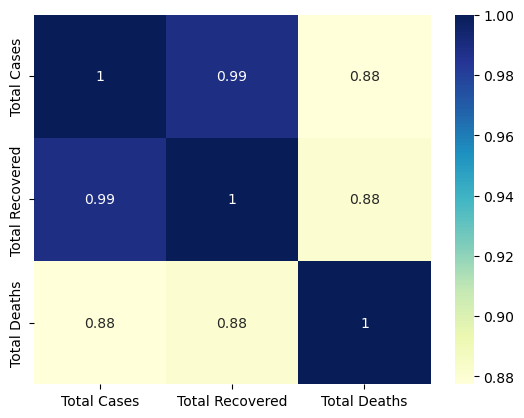

In [74]:
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

# 6. How many countries have more than 1 million total cases?

In [80]:
more_than_1million=df[df['Total Cases']>1000000]
len(more_than_1million)

73

There are 73 countries have more than 1 million total cases

# 7. Which country has the highest percentage of recovery cases? 

In [86]:
df['%Total Recovered']=df['Total Recovered']/df['Total Cases']*100

In [89]:
df.sort_values('%Total Recovered',ascending=False)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,%Total Recovered
230,231,Tokelau,5.0,30057.777778,2.993905e+06,5.000000,3.249316e+07,1378.0,5.987810e+07
221,222,Tuvalu,2805.0,30057.777778,2.993905e+06,2805.000000,3.249316e+07,12066.0,1.067346e+05
214,215,St. Barth,5420.0,6.000000,2.993905e+06,90998.849057,7.864600e+04,9945.0,5.523810e+04
208,209,British Virgin Islands,7305.0,64.000000,2.993905e+06,90998.849057,1.073390e+05,30596.0,4.098433e+04
206,207,Sierra Leone,7760.0,126.000000,2.993905e+06,90998.849057,2.599580e+05,8306436.0,3.858125e+04
...,...,...,...,...,...,...,...,...,...
220,221,Wallis and Futuna,3427.0,7.000000,4.380000e+02,2982.000000,2.050800e+04,10982.0,1.278086e+01
131,132,French Guiana,98028.0,420.000000,1.125400e+04,86354.000000,6.512570e+05,314169.0,1.148039e+01
193,194,Saint Martin,12233.0,63.000000,1.399000e+03,10771.000000,1.123820e+05,39730.0,1.143628e+01
186,187,Samoa,16087.0,29.000000,1.605000e+03,14453.000000,1.873970e+05,202239.0,9.977000e+00


'Tokelau' country has a highest percentage of recovery rate

# 8.How many countries have a higher number of deaths than recoveries?

In [96]:
df['death>recovey']=df['Total Deaths']>df['Total Recovered']

In [100]:
df[df['death>recovey']]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,%Total Recovered,death>recovey
222,223,Saint Helena,2166.0,30057.777778,2.0,2164.0,3.249316e+07,6115.0,0.092336,True
223,224,Falkland Islands,1930.0,30057.777778,1930.0,0.0,8.632000e+03,3539.0,100.000000,True
225,226,Niue,747.0,30057.777778,746.0,1.0,3.249316e+07,1622.0,99.866131,True
227,228,Vatican City,29.0,30057.777778,29.0,0.0,3.249316e+07,799.0,100.000000,True


In [101]:
len(df[df['death>recovey']])

4

There are 4 countries have a higher number of deaths than recoveries 

Countries:

Saint Helena	

Falkland Island

Niue

Vatican City


# 9.Which country has the highest ratio of total deaths to total cases?

In [102]:
df['Death to Case Ratio']=df['Total Deaths'] / df['Total Cases']

In [112]:
df.sort_values('Death to Case Ratio',ascending=False)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,%Total Recovered,death>recovey,Death to Case Ratio
230,231,Tokelau,5.0,30057.777778,2.993905e+06,5.0,3.249316e+07,1378.0,5.987810e+07,False,6011.555556
227,228,Vatican City,29.0,30057.777778,2.900000e+01,0.0,3.249316e+07,799.0,1.000000e+02,True,1036.475096
225,226,Niue,747.0,30057.777778,7.460000e+02,1.0,3.249316e+07,1622.0,9.986613e+01,True,40.237989
223,224,Falkland Islands,1930.0,30057.777778,1.930000e+03,0.0,8.632000e+03,3539.0,1.000000e+02,True,15.573978
222,223,Saint Helena,2166.0,30057.777778,2.000000e+00,2164.0,3.249316e+07,6115.0,9.233610e-02,True,13.877090
...,...,...,...,...,...,...,...,...,...,...,...
219,220,Saint Pierre Miquelon,3452.0,2.000000,2.449000e+03,1001.0,2.540000e+04,5759.0,7.094438e+01,False,0.000579
147,148,Bhutan,62605.0,21.000000,6.156400e+04,1020.0,2.303734e+06,787941.0,9.833719e+01,False,0.000335
209,210,Cook Islands,7011.0,2.000000,6.993000e+03,16.0,1.969000e+04,17571.0,9.974326e+01,False,0.000285
216,217,Nauru,4621.0,1.000000,4.609000e+03,11.0,2.050900e+04,10903.0,9.974032e+01,False,0.000216


'Tokelau' as has the highest ratio of total deaths to total cases

# 10. Which countries have a higher number of active cases than recovered cases?

In [114]:
df['Active > Recovered'] = df['Active Cases'] > df['Total Recovered']


In [117]:
df[df['Active > Recovered']]['Country']

131        French Guiana
167       Cayman Islands
181            Nicaragua
186                Samoa
193         Saint Martin
195            Greenland
220    Wallis and Futuna
222         Saint Helena
Name: Country, dtype: object

Countries:

French Guiana

Cayman Islands

Nicaragua

Samoa

Saint Martin

Greenland

Wallis and Futuna

Saint Helena
